This is the another version of already written convolutional neural network but i have made some changes to the layers and the epochs to gain high accuracy


**Traffic Signs Recognition**


> Traffic signs can be analysed using forward-facing cameras in many modern cars, vehicles and trucks. One of the basic use cases of a traffic-sign recognition system is for speed limits. Modern traffic-sign recognition systems are being developed using convolutional neural networks, mainly driven by the requirements of autonomous vehicles and self-driving cars. In these scenarios, the detection system needs to identify a variety of traffic signs and not just speed limits. A convolutional neural network can be trained to take in these predefined traffic signs and 'learn' using Deep Learning techniques.



> The German Traffic signs recognition benchmark dataset (GTSRB) is used to build a Data Science Project on Traffic Signs Recognition using CNN in Python language.



 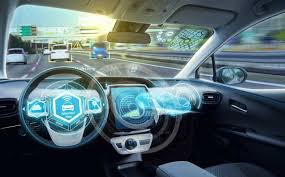




```
import numpy as np 
```
NumPy is a python library used for working with arrays.


```
import pandas as pd 
```
Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

```
import matplotlib.pyplot as plt
```
 matplotlib.pyplot keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes.


```
import tensorflow as tf
```
TensorFlow is a Python library for fast numerical computing created and released by Google. 


```
import cv2
```
OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 


```
from PIL import Image
```
To load the image, we simply import the image module from the pillow and call the Image.


```
import os
```
The OS module in Python provides a way of using operating system dependent functionality.

In [ ]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

**path** − This is the directory, which needs to be explored.

Python method **listdir()** returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order.

The **try** block lets you test a block of code for errors. The **except** block lets you handle the error. 

**np.arange()** is one of the array creation routines based on numerical ranges.

**random.seed()**  -
random() function generates numbers for some values. This value is also called seed value.

**numpy.random.shuffle()**-Used to get the random positioning of different integer values in the numpy array or we can say that all the values in an array will be shuffled randomly.




In [ ]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "../input/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

../input/train/0/
../input/train/1/
../input/train/2/
../input/train/3/
../input/train/4/
../input/train/5/
../input/train/6/
../input/train/7/
../input/train/8/
../input/train/9/
../input/train/10/
../input/train/11/
../input/train/12/
../input/train/13/
../input/train/14/
../input/train/15/
../input/train/16/
../input/train/17/
../input/train/18/
../input/train/19/
../input/train/20/
../input/train/21/
../input/train/22/
../input/train/23/
../input/train/24/
../input/train/25/
../input/train/26/
../input/train/27/
../input/train/28/
../input/train/29/
../input/train/30/
../input/train/31/
../input/train/32/
../input/train/33/
../input/train/34/
../input/train/35/
../input/train/36/
../input/train/37/
../input/train/38/
../input/train/39/
../input/train/40/
../input/train/41/
../input/train/42/


**Training set:** A set of examples used for learning, that is to fit the parameters of the classifier. 

**Validation set:** A set of examples used to tune the parameters of a classifier

Keras provides numpy utility library, which provides functions to perform actions on numpy arrays.

Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [ ]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)



```
from keras.models import Sequential
```

> From the definition of Keras documentation the Sequential model is a linear stack of layers. 



```
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
```

> A layer is a callable object that takes as input one or more tensors and that outputs one or more tensors.

Keras **Conv2D** is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

**MaxPooling2D**- Max pooling operation for 2D spatial data. Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. 

**Dense layer** is the regular deeply connected neural network layer. 

A **flatten layer** collapses the spatial dimensions of the input into the channel dimension. 

The **Dropout layer** randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

Keras model provides a method, **compile()** to compile the model.







In [ ]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

An **epoch** is a measure of the number of times all of the training vectors are used once to update the weights.

**. fit()** function it makes assumptions: The entire training set can fit into the Random Access Memory of the computer.

Train on 31368 samples, validate on 7841 samples
Epoch 1/20
31368/31368 [==============================] - 13s 423us/step - loss: 1.2687 - acc: 0.6400 - val_loss: 0.2215 - val_acc: 0.9384
Epoch 2/20
31368/31368 [==============================] - 6s 196us/step - loss: 0.2946 - acc: 0.9074 - val_loss: 0.0870 - val_acc: 0.9762
Epoch 3/20
31368/31368 [==============================] - 6s 187us/step - loss: 0.1833 - acc: 0.9436 - val_loss: 0.0743 - val_acc: 0.9815
Epoch 4/20
31368/31368 [==============================] - 6s 189us/step - loss: 0.1377 - acc: 0.9570 - val_loss: 0.0638 - val_acc: 0.9843
Epoch 5/20
31368/31368 [==============================] - 6s 181us/step - loss: 0.1156 - acc: 0.9630 - val_loss: 0.0543 - val_acc: 0.9867
Epoch 6/20
31368/31368 [==============================] - 7s 209us/step - loss: 0.1049 - acc: 0.9679 - val_loss: 0.0434 - val_acc: 0.9875
Epoch 7/20
31368/31368 [==============================] - 6s 187us/step - loss: 0.0895 - acc: 0.9713 - val_loss: 0.0329 - 

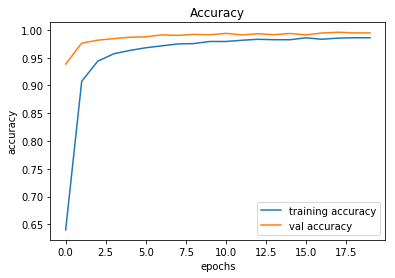

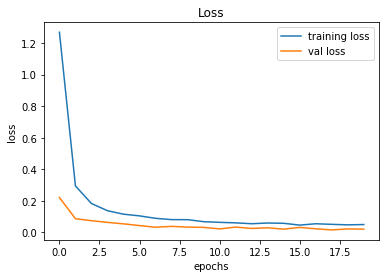

In [ ]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
%cd gtsrb-german-traffic-sign

/kaggle/input


In [ ]:
#Predicting with the test data
y_test=pd.read_csv("Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../input/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

NameError: ignored

To test the accuracy:

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

NameError: ignored

**The End**